In [1]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline


%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)


********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})


In [3]:
# Instantiate classes
cortex = Cortex()
gr = GRAPH(cortex)

# Figure style
fontsize =18
# styling
gammaColor = '#00cc99'

matplotlib.rc('xtick', labelsize=fontsize)
matplotlib.rc('ytick', labelsize=fontsize)
matplotlib.rc('axes', labelsize = fontsize)
matplotlib.rc('axes', titlesize = fontsize)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('axes', facecolor = "white")

In [10]:
DEVICE = '/gpu:0'

T=1100
g=5
### input 1: apple
nu = 100
gpu1 = TfSingleNet(N=2, T=T, disp=False, tauv=15, nu=nu, g0=g, 
                   device=DEVICE, spikeMonitor=True, startPlast=999999)
gpu1.input = np.concatenate([np.zeros(T//2), np.ones(T//2)])*100
# gpu1.input = np.ones(T)
gpu1.initWGap = False
gpu1.dt=0.1
gpu1.weight_step = 1
gpu1.startPlast=0
gpu1.runTFSimul()
gpu1.ratio = 1


5.62


(350, 750)

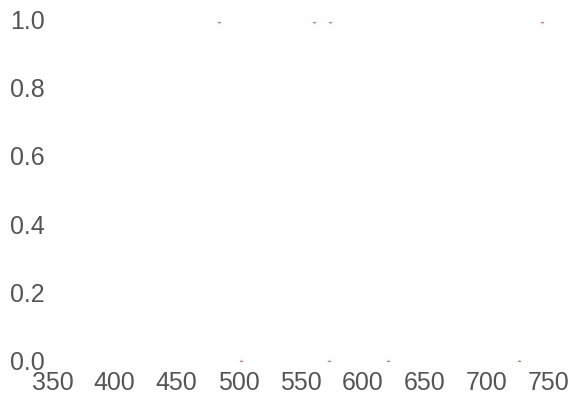

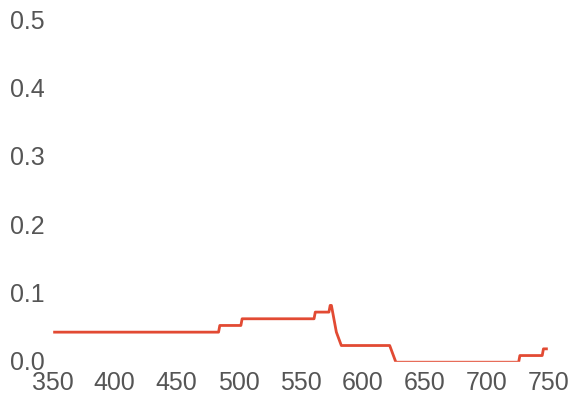

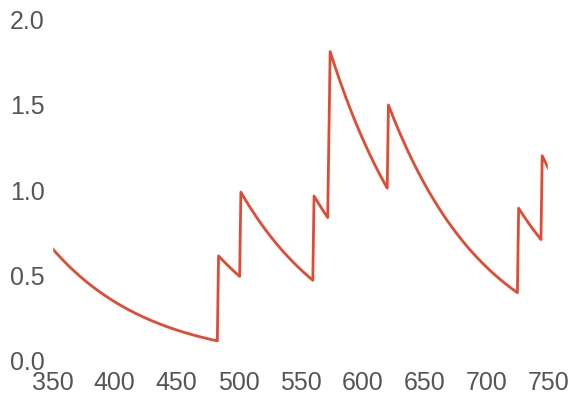

In [15]:
r = gpu1.raster
xlim = [T//2 - 200, T//2 + 200]
x,y = convertRaster(r.T)
plt.plot(x,y, '.')
plt.xlim(xlim)

plt.figure()
plt.plot(gpu1.gamma)
plt.xlim(xlim)
plt.ylim([0,None])

plt.figure()
plt.plot(gpu1.lowsp)
plt.xlim(xlim)
# plt.imshow(gpu1.raster.T)
# plt.xticks([])
# plt.yticks([])

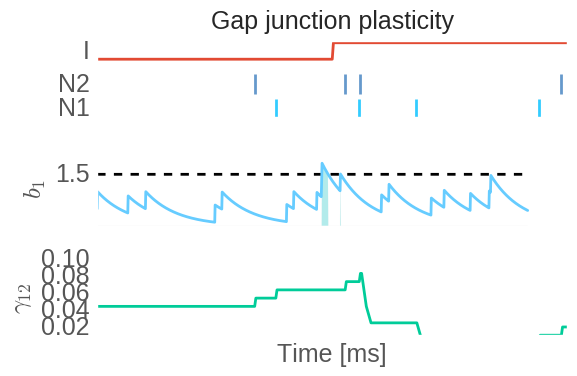

In [19]:
# N = 2
# G = 2.5
# d1 = 0
# d2 = 2000
# d3 = 2000
# before = d1
# after = d2+d3
# # before = 10000
# # after = 40000
# S = 150
# sigma = 0

# ratio = 15
# FACT = 1
# WII = 500
# LTD  = 4.7e-6 * FACT * N
# LTP = ratio * LTD
# r=0.
# model = "gp-izh"

# xlim = [1950,2050]
# cortex.runSimulation(N=N, r=r,G=G,S=S, d1=d1, d2=d2, d3=d3, before=before, after=after,s=sigma,
#                WII=WII, LTP=LTP, LTD=LTD, model=model)
# spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = cortex.readSimulation(N, r, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD, model, )
# P = gr.fourier(ssp1)

xlim = [T//2 - 200, T//2 + 200]
titlestr= 'Gap junction plasticity'

fig = plt.figure(figsize=(6,4))
spikes_x = x
spikes_y = y
gamma = gpu1.gamma
lowsp = gpu1.lowsp
N1 =[]
N2 = []
for i in range(len(spikes_x)):
    if spikes_y[i] == 1:
        N2.append([spikes_x[i],spikes_y[i]])
    else:
        N1.append([spikes_x[i],spikes_y[i]])
N1 = np.array(N1)
N2 = np.array(N2)



### GAMMA
ax= fig.add_subplot(313)
ax.set_xticklabels([])
# ax.set_xlim([1.95,2.05])
# ax.set_ylim([2.487,2.4876])
# ax.set_yticks([2.487,2.4875])
# ax.set_yticklabels(['2.487','2.4875'], fontsize=12)
ax.plot(gamma, color=gammaColor)

ax.set_ylim([0.01,0.1])
ax.set_ylabel(r'$\gamma_{12}$')
ax.set_xlabel('Time [ms]')
# ax.set_yticks([])
ax.set_xticks([1.950,2.050])
ax.set_xticklabels([0,100])
ax.set_xlim(xlim)


### SPIKES
ax=fig.add_subplot(311)
ax.set_title(titlestr, y=1.08)
# ax.scatter(spikes_x[:10000], spikes_y[:10000], marker='|', s=500, linewidth=2.)
ax.plot(N1[:,0], N1[:,1], '|', color='#33ccff', markersize=14, markeredgewidth=2)
ax.plot(N2[:,0], N2[:,1]+0.5, '|', color='#6699cc', markersize=14,markeredgewidth=2)
ax.set_xlim(xlim)
ax.set_ylim([0,0.1])
# ax.set_yticklabels([])
st=[]
for i in range((T)):
    st.append(4 if (i>T//2) else 3)
# ax=fig.add_subplot(313)
ax.plot(st)
ax.set_xlim(xlim)
ax.set_xticks([])
ax.set_yticks([0,1.5,3.5])
ax.set_yticklabels(['N1', 'N2','I'])
ax.set_ylim([-0.5,4.1])
ax.set_axis_bgcolor((1,1,1))

# ax.set_ylim([-1,55])



ax = fig.add_subplot(312)
# dep = lowsp[1950*4:2050*4]
dep = lowsp
ax.plot(np.ones(len(dep))*1.5, 'k--')
ax.fill(np.arange(len(dep)), dep*(dep>1.5), facecolor='c', alpha=0.3,)
ax.plot(dep,"#66ccff")
ax.set_ylabel(r'$b_1$')
ax.set_xticks([])
ax.set_yticks([1.5])
ax.set_ylim([0,2.2])
plt.tight_layout()
plt.savefig(PAPER+'fig2-plasticity.eps')


In [31]:
?plt.plot

In [7]:
N=N1[:,0]

In [8]:
N.tolist()

[0,
 1,
 2,
 2,
 4,
 30,
 32,
 51,
 53,
 72,
 73,
 92,
 94,
 113,
 114,
 133,
 135,
 154,
 155,
 174,
 176,
 195,
 196,
 215,
 217,
 236,
 237,
 256,
 258,
 277,
 278,
 297,
 299,
 318,
 319,
 338,
 340,
 359,
 360,
 379,
 381,
 400,
 401,
 420,
 422,
 441,
 442,
 461,
 463,
 482,
 483,
 502,
 504,
 523,
 524,
 543,
 545,
 564,
 565,
 584,
 586,
 605,
 606,
 625,
 627,
 646,
 647,
 666,
 668,
 687,
 688,
 707,
 709,
 728,
 729,
 748,
 750,
 769,
 770,
 789,
 791,
 810,
 811,
 830,
 832,
 851,
 852,
 871,
 873,
 892,
 893,
 912,
 914,
 933,
 934,
 953,
 955,
 974,
 975,
 994,
 996,
 1015,
 1016,
 1035,
 1037,
 1056,
 1057,
 1076,
 1078,
 1097,
 1098,
 1117,
 1119,
 1138,
 1139,
 1158,
 1160,
 1179,
 1180,
 1199,
 1201,
 1220,
 1221,
 1240,
 1242,
 1261,
 1262,
 1281,
 1283,
 1302,
 1303,
 1322,
 1324,
 1343,
 1344,
 1363,
 1365,
 1384,
 1385,
 1404,
 1406,
 1425,
 1426,
 1445,
 1447,
 1466,
 1467,
 1486,
 1488,
 1507,
 1508,
 1527,
 1529,
 1548,
 1549,
 1568,
 1570,
 1589,
 1590,
 1609,